### GOOGLE ADS DATA ANALYTICS SALES DATASET

#### IMPORT THE NECESSARY LIBRARIES

In [41]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#
df=pd.read_csv(r"D:\DATASCIENCE\NOTES\pandas notes\PROJECT\GoogleAds_DataAnalytics_Sales_Uncleaned.csv")
print(df.head(20))

    Ad_ID          Campaign_Name  Clicks  Impressions     Cost  Leads  \
0   A1000    DataAnalyticsCourse   104.0       4498.0  $231.88   14.0   
1   A1001    DataAnalyticsCourse   173.0       5107.0  $216.84   10.0   
2   A1002    Data Anlytics Corse    90.0       4544.0  $203.66   26.0   
3   A1003  Data Analytcis Course   142.0       3185.0  $237.66   17.0   
4   A1004   Data Analytics Corse   156.0       3361.0   $195.9   30.0   
5   A1005    DataAnalyticsCourse   195.0       3776.0  $243.57   10.0   
6   A1006   Data Analytics Corse   116.0       4480.0  $237.79   17.0   
7   A1007   Data Analytics Corse   184.0       5060.0  $229.61   23.0   
8   A1008   Data Analytics Corse   113.0       5434.0      NaN   27.0   
9   A1009  Data Analytcis Course   166.0       3355.0  $186.78   24.0   
10  A1010    DataAnalyticsCourse   101.0       5399.0  $236.79   20.0   
11  A1011   Data Analytics Corse   101.0       3613.0  $208.12   24.0   
12  A1012  Data Analytcis Course   125.0       3259

### DATE FORMAT CORRECTION

In [42]:
# FIRST: Parse dates BEFORE any other transformations
def parse_mixed_dates(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    if not date_str or date_str.lower() == 'nan':
        return pd.NaT
    
    try:
        # Try dd-mm-yyyy format (29-11-2024)
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        try:
            # Try yyyy/mm/dd format (2024/11/28)  
            return pd.to_datetime(date_str, format='%Y/%m/%d')
        except ValueError:
            try:
                # Try yyyy-mm-dd format (2024-11-02)
                return pd.to_datetime(date_str, format='%Y-%m-%d')
            except ValueError:
                return pd.to_datetime(date_str, errors='coerce')

# Parse dates from the ORIGINAL data
df['Ad_Date'] = df['Ad_Date'].apply(parse_mixed_dates)

print(f"Successfully parsed dates: {df['Ad_Date'].notna().sum()}")
print(f"Failed to parse (NaT): {df['Ad_Date'].isna().sum()}")
print(f"\nSample parsed dates:")
print(df['Ad_Date'].head(10))

Successfully parsed dates: 2600
Failed to parse (NaT): 0

Sample parsed dates:
0   2024-11-16
1   2024-11-20
2   2024-11-16
3   2024-11-26
4   2024-11-22
5   2024-11-16
6   2024-11-06
7   2024-11-24
8   2024-11-24
9   2024-11-12
Name: Ad_Date, dtype: datetime64[ns]


### CHECKING DATA TYPES

In [3]:
print(df.dtypes)

Ad_ID               object
Campaign_Name       object
Clicks             float64
Impressions        float64
Cost                object
Leads              float64
Conversions        float64
Conversion Rate    float64
Sale_Amount         object
Ad_Date             object
Location            object
Device              object
Keyword             object
dtype: object


### DESCRIBE

In [ ]:
#TO DESCRIBE THE DATA
print(df.describe)

### INFO

In [ ]:
#TO GET THE INFORMATION ABOUT THE DATA
print(df.info)

### DUPLICATES

In [32]:
#TO FIND THE DUPLICATED VALUES
print(df.duplicated)

<bound method DataFrame.duplicated of       Ad_ID          Campaign_Name  Clicks  Impressions     Cost  Leads  \
0     A1000    DataAnalyticsCourse   104.0       4498.0  $231.88   14.0   
1     A1001    DataAnalyticsCourse   173.0       5107.0  $216.84   10.0   
2     A1002    Data Anlytics Corse    90.0       4544.0  $203.66   26.0   
3     A1003  Data Analytcis Course   142.0       3185.0  $237.66   17.0   
4     A1004   Data Analytics Corse   156.0       3361.0   $195.9   30.0   
...     ...                    ...     ...          ...      ...    ...   
2595  A3595    DataAnalyticsCourse    88.0       5344.0  $242.07   17.0   
2596  A3596    DataAnalyticsCourse   154.0       3211.0  $248.28   14.0   
2597  A3597    Data Anlytics Corse   113.0       3808.0  $233.25   18.0   
2598  A3598   Data Analytics Corse   196.0       5853.0  $220.13   16.0   
2599  A3599   Data Analytics Corse     NaN       5453.0      NaN   12.0   

      Conversions  Conversion Rate Sale_Amount     Ad_Date   

### CHECKING THE FIRST 5 ROWS

In [33]:
#CHECKING THE FIRST 5 ROWS
print(df.head())

   Ad_ID          Campaign_Name  Clicks  Impressions     Cost  Leads  \
0  A1000    DataAnalyticsCourse   104.0       4498.0  $231.88   14.0   
1  A1001    DataAnalyticsCourse   173.0       5107.0  $216.84   10.0   
2  A1002    Data Anlytics Corse    90.0       4544.0  $203.66   26.0   
3  A1003  Data Analytcis Course   142.0       3185.0  $237.66   17.0   
4  A1004   Data Analytics Corse   156.0       3361.0   $195.9   30.0   

   Conversions  Conversion Rate Sale_Amount     Ad_Date   Location   Device  \
0          7.0            0.058       $1892  2024-11-16  hyderabad  desktop   
1          8.0            0.046       $1679  20-11-2024  hyderabad   mobile   
2          9.0              NaN       $1624  2024/11/16  hyderabad  Desktop   
3          6.0              NaN       $1225  2024-11-26  HYDERABAD   tablet   
4          8.0              NaN       $1091  2024-11-22  hyderabad  desktop   

                  Keyword  
0    learn data analytics  
1   data analytics course  
2   data

### CHECKING THE LAST 5 ROWS

In [4]:
#check the last 5 rows
print(df.tail())

      Ad_ID         Campaign_Name  Clicks  Impressions     Cost  Leads  \
2595  A3595   DataAnalyticsCourse    88.0       5344.0  $242.07   17.0   
2596  A3596   DataAnalyticsCourse   154.0       3211.0  $248.28   14.0   
2597  A3597   Data Anlytics Corse   113.0       3808.0  $233.25   18.0   
2598  A3598  Data Analytics Corse   196.0       5853.0  $220.13   16.0   
2599  A3599  Data Analytics Corse     NaN       5453.0      NaN   12.0   

      Conversions  Conversion Rate Sale_Amount     Ad_Date   Location  \
2595          9.0            0.054       $1418  29-11-2024  HYDERABAD   
2596          6.0            0.039       $1950  2024/11/28  hyderabad   
2597          4.0            0.035       $1085  2024-11-02   Hyderbad   
2598          7.0            0.036       $1558  2024-11-08   hydrebad   
2599          5.0              NaN       $1174  2024/11/22  HYDERABAD   

       Device                 Keyword  
2595   MOBILE    online data analytic  
2596   TABLET   data analitics onlin

### CHECKING THE TOTAL NUMBER OF MISSING VALUES

In [5]:
#checking the total number of missing values
print(df.isna().sum())
print('\n')
print("Total number of missing values :",df.isna().sum().sum())

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64


Total number of missing values : 1150


### DATA PROCESSING

### CONVERTING MONEY VALUE FROM DOLLAR($) TO INR(₹)

In [43]:
#CONERTING  COST & SALE_AMOUNT COLUMN FROM  DOALLAR TO INR
df['Cost'] = df['Cost'].str.replace('$', '', regex=False)
df['Cost'] = df['Cost'].astype(float) * 83
df['Sale_Amount'] = df['Sale_Amount'].str.replace('$', '', regex=False).astype(float)
df['Sale_Amount'] = df['Sale_Amount'] * 83

print(df.dtypes)
print('\n')
print(df.head())

Ad_ID                      object
Campaign_Name              object
Clicks                    float64
Impressions               float64
Cost                      float64
Leads                     float64
Conversions               float64
Conversion Rate           float64
Sale_Amount               float64
Ad_Date            datetime64[ns]
Location                   object
Device                     object
Keyword                    object
dtype: object


   Ad_ID          Campaign_Name  Clicks  Impressions      Cost  Leads  \
0  A1000    DataAnalyticsCourse   104.0       4498.0  19246.04   14.0   
1  A1001    DataAnalyticsCourse   173.0       5107.0  17997.72   10.0   
2  A1002    Data Anlytics Corse    90.0       4544.0  16903.78   26.0   
3  A1003  Data Analytcis Course   142.0       3185.0  19725.78   17.0   
4  A1004   Data Analytics Corse   156.0       3361.0  16259.70   30.0   

   Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location   Device  \
0          7.0          

### RENAMING THE COLUMNS

In [44]:
#RENAMING THE COLUMNS
#------------------------

df.rename(columns={
    'Ad_ID': 'AD_ID',
    'Campaign_Name': 'CAMPAIGN_NAME',
    'Clicks': 'CLICKS',
    'Impressions': 'IMPRESSIONS',
    'Cost': 'COST',
    'Leads': 'LEADS',
    'Conversions': 'CONVERSIONS',
    'Conversion Rate': 'CONVERSION RATE',
    'Sale_Amount': 'SALE_AMOUNT',
    'Ad_Date': 'AD_DATE',
    'Location': 'LOCATION',
    'Device': 'DEVICE',
    'Keyword': 'KEYWORD'
}, inplace=True)

print(df.columns)

Index(['AD_ID', 'CAMPAIGN_NAME', 'CLICKS', 'IMPRESSIONS', 'COST', 'LEADS',
       'CONVERSIONS', 'CONVERSION RATE', 'SALE_AMOUNT', 'AD_DATE', 'LOCATION',
       'DEVICE', 'KEYWORD'],
      dtype='object')


### DATA CLEANING


### CHANGING THE VALUES INTO SAME FORMAT 

In [45]:
# # CHANGING THE VALUES INTO SAME FORMAT(lowercase letters)
text_columns = ['CAMPAIGN_NAME', 'LOCATION', 'DEVICE', 'KEYWORD']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower()

### FILLING THE MISSING NUMERIC COLUMNS WITH 0 (except convertion rate)

In [46]:

#(fill the missing numeric columns with 0 except convertion rate )
df['CLICKS'] = df['CLICKS'].fillna(0)
df['IMPRESSIONS'] = df['IMPRESSIONS'].fillna(0)
df['COST'] = df['COST'].fillna(0)
df['CONVERSIONS'] = df['CONVERSIONS'].fillna(0)


print(df.dtypes)
print('\n')
print(df.head())
print('\n')
print(df.tail())

AD_ID                      object
CAMPAIGN_NAME              object
CLICKS                    float64
IMPRESSIONS               float64
COST                      float64
LEADS                     float64
CONVERSIONS               float64
CONVERSION RATE           float64
SALE_AMOUNT               float64
AD_DATE            datetime64[ns]
LOCATION                   object
DEVICE                     object
KEYWORD                    object
dtype: object


   AD_ID          CAMPAIGN_NAME  CLICKS  IMPRESSIONS      COST  LEADS  \
0  A1000    dataanalyticscourse   104.0       4498.0  19246.04   14.0   
1  A1001    dataanalyticscourse   173.0       5107.0  17997.72   10.0   
2  A1002    data anlytics corse    90.0       4544.0  16903.78   26.0   
3  A1003  data analytcis course   142.0       3185.0  19725.78   17.0   
4  A1004   data analytics corse   156.0       3361.0  16259.70   30.0   

   CONVERSIONS  CONVERSION RATE  SALE_AMOUNT    AD_DATE   LOCATION   DEVICE  \
0          7.0          

In [47]:
# Calculate profit
df['PROFIT'] = df['SALE_AMOUNT'] - df['COST']

### DATA UNDERSTANDING

#### 1.KEY WORD PERFOMANCE CHECKING

##### To find which keyword performed best for this campign (highest conversion/best conversion rate)

In [15]:
#TO FIND... which keyword performed best for this campign (highest conversion/best conversion rate)

keyword_perf=df.groupby('KEYWORD')[['CLICKS','IMPRESSIONS','LEADS','SALE_AMOUNT']].sum().sort_values('SALE_AMOUNT',ascending=False)
print(keyword_perf)
df['high_profit_kw']=df['SALE_AMOUNT']-df['COST']
profit_kw=df.groupby('KEYWORD')['high_profit_kw'].sum().sort_values(ascending=False)
df.rename(columns={'TOTAL':'KEYWORD'},inplace=True)
print('\n','high profit generated keyword',profit_kw)

                         CLICKS  IMPRESSIONS   LEADS  SALE_AMOUNT
KEYWORD                                                          
learn data analytics    58698.0    1920160.0  8777.0   53398797.0
data analytics course   59369.0    1966691.0  8673.0   52682009.0
online data analytic    60920.0    1995193.0  8803.0   52171891.0
analytics for data      56021.0    1950444.0  8604.0   50815007.0
data anaytics training  54786.0    1835565.0  8008.0   48973320.0
data analitics online   55931.0    1848220.0  8185.0   48077335.0

 high profit generated keyword KEYWORD
learn data analytics      46013842.95
data analytics course     45508278.33
online data analytic      44838781.24
analytics for data        43785252.28
data anaytics training    42237884.11
data analitics online     41526043.74
Name: high_profit_kw, dtype: float64


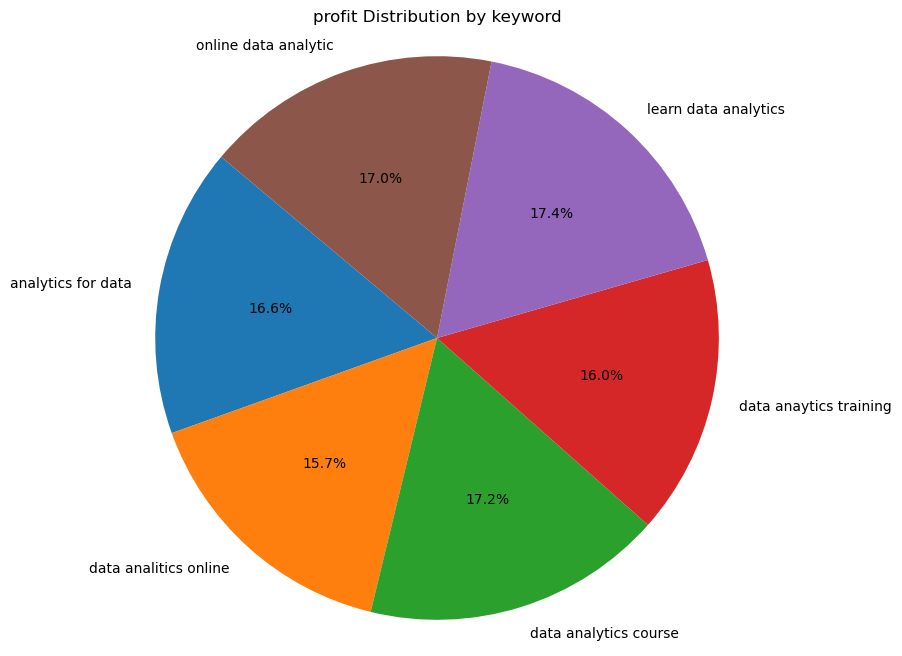

In [13]:
# KEY WORD PERFOMANCE CHECKING
df['high_profit_kw']=df['SALE_AMOUNT']-df['COST']

profit_kw=df.groupby('KEYWORD')['high_profit_kw'].sum()

plt.figure(figsize=(8,8))
plt.pie(profit_kw,labels=profit_kw.index,autopct='%1.1f%%',startangle=140)
plt.title('profit Distribution by keyword')
plt.axis('equal')
plt.show()

This pie chart shows profit distribution by keyword for data analytics-related terms.

Key insights:

"learn data analytics" generates the highest profit (17.4%)

"data analytics course" is second highest (17.2%)

"online data analytics" performs lowest (17.0%)

All keywords perform fairly equally, ranging from 15.7% to 17.4%

The profit is well-distributed across all 6 data analytics keywords

Simple summary: All data analytics keywords generate similar profit shares (15-17% each), with "learn data analytics" and "data analytics course" being the top performers

#### 2.DATE WITH HIGHEST PROFITABILITY

##### Find which date generated highest profit

In [48]:
profit_by_date = (df.dropna(subset=['AD_DATE'])
                   .groupby('AD_DATE')['PROFIT']
                   .sum()
                   .sort_values(ascending=False))

print(f"\nProfit by date (top 10):")
print(profit_by_date.head(10))

if len(profit_by_date) > 0:
    max_profit_date = profit_by_date.index[0]
    max_profit = profit_by_date.iloc[0]
    print(f"\nHighest profit date: {max_profit_date.strftime('%d-%m-%Y')}")
    print(f"Profit amount: ₹{max_profit:,.2f}")



Profit by date (top 10):
AD_DATE
2024-11-14    11844883.52
2024-11-18    10713035.76
2024-11-20    10135915.18
2024-11-25     9823932.29
2024-11-23     9697569.77
2024-11-15     9562021.64
2024-11-16     9443214.61
2024-11-05     9397397.78
2024-11-21     9362382.57
2024-11-08     9118945.23
Name: PROFIT, dtype: float64

Highest profit date: 14-11-2024
Profit amount: ₹11,844,883.52


#### 3.WEEKEND VS WEEKDAY PERFOMANCE

##### Does weekend days made profits than weekdays

In [51]:

# CHECKING if weekend days made more profits than weekdays

df['PROFIT'] = df['SALE_AMOUNT']-df['COST']
df['DAY_OF_WEEK'] = pd.to_datetime(df['AD_DATE']).dt.dayofweek
df['WEEKEND'] = df['DAY_OF_WEEK'].isin([5, 6])

weekend_profit = df[df['WEEKEND']]['PROFIT'].sum()
weekday_profit = df[~df['WEEKEND']]['PROFIT'].sum()

print('WEEK DAY TOTAL PROFIT :₹', weekday_profit)
print('WEEKEND DAY TOTAL PROFIT :₹', weekend_profit,)
print('\n')

if weekday_profit > weekend_profit:
    print('WEEK DAYS GENERATING MORE PROFIT')
else:
    print('WEEKEND DAY GENERATING MORE PROFIT')


WEEK DAY TOTAL PROFIT :₹ 188315867.21
WEEKEND DAY TOTAL PROFIT :₹ 75594215.44


WEEK DAYS GENERATING MORE PROFIT


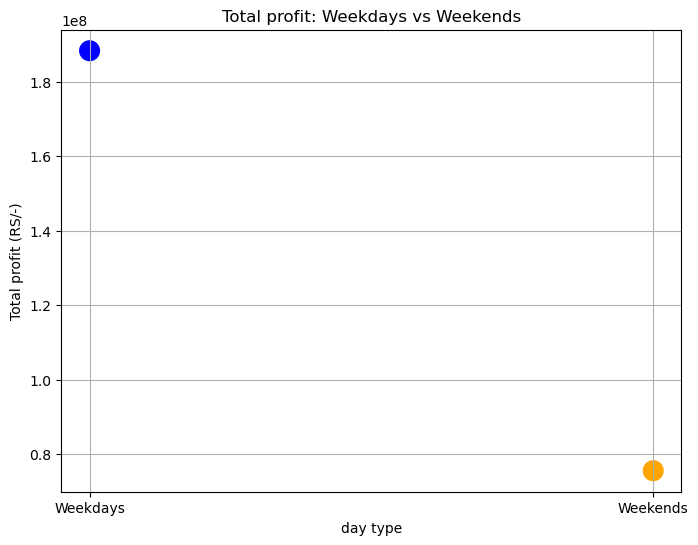

In [52]:
#prepare data for plotting
categories = ['Weekdays','Weekends']
profits=[weekday_profit,weekend_profit]

#scatter plot
plt.figure(figsize=(8,6))
plt.scatter(categories,profits,color=['blue','orange'],s=200) #big points

plt.title('Total profit: Weekdays vs Weekends')
plt.xlabel('day type')
plt.ylabel('Total profit (RS/-)')
plt.grid(True)
plt.show()

This chart shows total profit is much higher on weekdays than on weekends. The blue point (weekdays) is far above the orange point (weekends), meaning your ads generate more profit during weekdays.

#### 4.DAILY CLICKS

##### How many times did consumers click the ad in a single day

In [53]:
#How many times did consumers click the ad in a single day
# -------------------------------------------------------------- 
clicks_per_day=df.groupby('AD_DATE')['CLICKS'].sum().sort_values(ascending=False)
print('CLICKS PER DAY!')
print('\n')
print(clicks_per_day)

#find the avrage clicks per day
avg_clicks_perday=df['CLICKS'].mean()
print('\nAVARAGE CLICKS PER DAY=',avg_clicks_perday)

CLICKS PER DAY!


AD_DATE
2024-11-14    15721.0
2024-11-18    13734.0
2024-11-25    13514.0
2024-11-05    12792.0
2024-11-20    12585.0
2024-11-26    12544.0
2024-11-21    12401.0
2024-11-24    12381.0
2024-11-22    12133.0
2024-11-08    12002.0
2024-11-13    11946.0
2024-11-15    11855.0
2024-11-04    11834.0
2024-11-29    11509.0
2024-11-23    11478.0
2024-11-16    11422.0
2024-11-07    10972.0
2024-11-09    10876.0
2024-11-19    10827.0
2024-11-02    10785.0
2024-11-12    10698.0
2024-11-03    10689.0
2024-11-27    10613.0
2024-11-10    10567.0
2024-11-06    10462.0
2024-11-30    10355.0
2024-11-01    10353.0
2024-11-28     9974.0
2024-11-11     9418.0
2024-11-17     9285.0
Name: CLICKS, dtype: float64

AVARAGE CLICKS PER DAY= 132.97115384615384


#### 5.DAILY POTENTIAL CONSUMER & PROFITABILITY

##### I .How many potential consumers(leads/convertion) got per day
##### II.What was the avarage profit per day

In [54]:

#TO FIND HOW MANY POTENTIAL CONSUMERS GOT PER DAY

potential_consumers_perday=df[['CONVERSIONS','LEADS']].sum()
print(potential_consumers_perday)



CONVERSIONS    16467.0
LEADS          51050.0
dtype: float64


In [56]:
#TO FIND THE AVARAGE PROFIT PER DAY

avarage_profit_perday=df['PROFIT'].mean()
print("AVARAGE PROFIT PER DAY:₹",avarage_profit_perday)

AVARAGE PROFIT PER DAY:₹ 107236.92915481511


#### 6.COST ANALYSIS

##### I .What was the avarage cost per day?
##### II.What was the total cost of running the campign

In [57]:
#TO FIND THE AVARAGE COST PER DAY

avg_cost_perday=df['COST'].mean()
print('AVARAGE COST PER DAY :',avg_cost_perday,'Rs/-')

AVARAGE COST PER DAY : 17186.485342307693 Rs/-


In [58]:
#TO FIND ..WHAT WAS THE TOTAL COST TO RUN THIS CAMPIGN

total_cost=df['COST'].sum()
print("TOTAL COST TO RUN THIS CAMPIGN:",total_cost,"Rs/-")

TOTAL COST TO RUN THIS CAMPIGN: 44684861.89 Rs/-


#### 7.CPC (Cost Per Click)


In [59]:
filt_df=df[df['CLICKS']>0]
cpc=filt_df['COST']/filt_df['CLICKS']
print("CPC :",cpc)
avg_cpc=cpc.mean()
print('\n')
print('AVARAGE COST PER CLICK :',avg_cpc)

CPC : 0       185.058077
1       104.033064
2       187.819778
3       138.913944
4       104.228846
           ...    
2594    195.787778
2595    228.316023
2596    133.813247
2597    171.325221
2598     93.218316
Length: 2488, dtype: float64


AVARAGE COST PER CLICK : 132.38079720043058


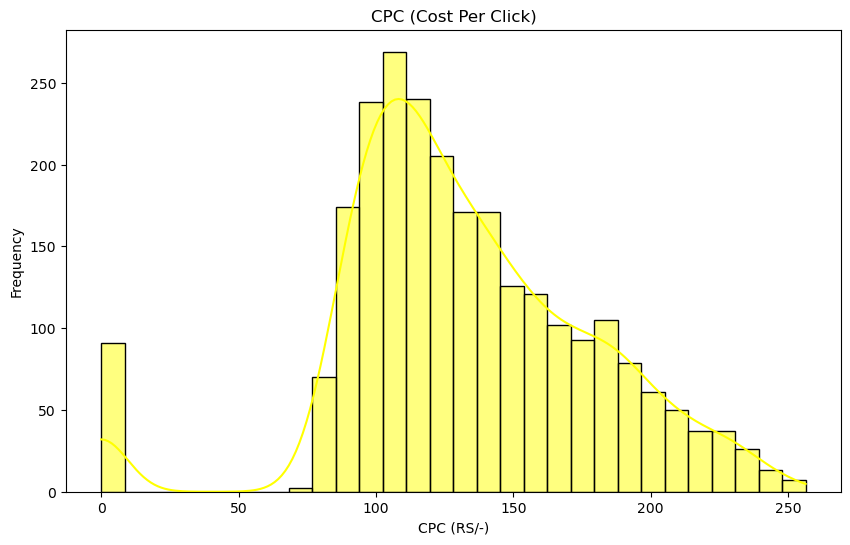

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(cpc,bins=30,kde=True,color='yellow')
plt.title('CPC (Cost Per Click)')
plt.xlabel('CPC (RS/-)')
plt.ylabel('Frequency')
plt.show()

This chart shows the cost per click (CPC) on this ads is usually between Rs.100 and Rs.150, with most clicks in that price range. The distribution is right-skewed, meaning higher CPCs are less common.This histogram shows that most clicks have a cost (CPC) between Rs.100 and Rs.150. Costs lower than Rs.100 or above Rs.200 are much less frequent. The CPC distribution is mainly clustered in the middle range.

#### 8.CPL (Cost Per Lead)

##### How much money spend on potential customers

In [61]:
fil_df=df[df['LEADS']>0]
cpl=fil_df['COST']/fil_df['LEADS']
print("CPL:",cpl)
avg_cpl=cpl.mean()
print('AVARGE CPL :',avg_cpl,'RS/-')


CPL: 0       1374.717143
1       1799.772000
2        650.145385
3       1160.340000
4        541.990000
           ...     
2595    1181.871176
2596    1471.945714
2597    1075.541667
2598    1141.924375
2599       0.000000
Length: 2552, dtype: float64
AVARGE CPL : 954.6307922472575 RS/-


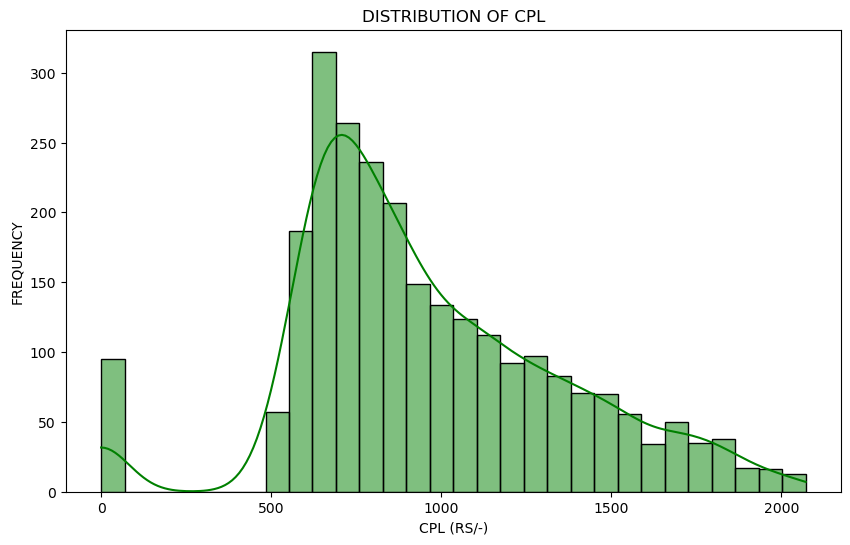

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(cpl,bins=30,kde=True,color='green')
plt.title('DISTRIBUTION OF CPL')
plt.xlabel('CPL (RS/-)')
plt.ylabel('FREQUENCY')
plt.show()

This chart shows the distribution of CPL (Cost Per Lead) on the ads. Most leads cost between Rs.500 and Rs.1000, with fewer leads costing either very low or very high amounts. The distribution is right-skewed, meaning low CPLs are rare and high CPLs become less frequent, but exist. Overall, your leads mostly fall in a reasonable cost range

#### 9.CPA (Cost Per Acquisition)

##### The average cost to get one new customer or lead

In [63]:
f_df=df[df['CONVERSIONS']>0]

cpa=f_df['COST']/f_df['CONVERSIONS']
print("CPA",cpa)
avg_cost_new_customers=cpa.mean()
print('AVARAGE COST TO GET A NEW CUSTOMER : ',avg_cost_new_customers,'RS/-')

CPA 0       2749.434286
1       2249.715000
2       1878.197778
3       3287.630000
4       2032.462500
           ...     
2595    2232.423333
2596    3434.540000
2597    4839.937500
2598    2610.112857
2599       0.000000
Length: 2526, dtype: float64
AVARAGE COST TO GET A NEW CUSTOMER :  3050.026132146313 RS/-


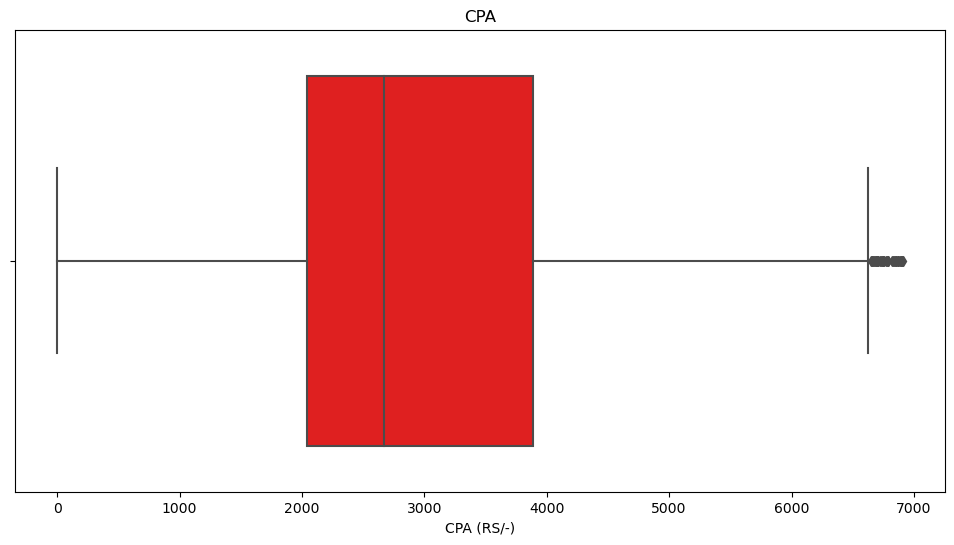

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=cpa,color='red')
plt.title('CPA')
plt.xlabel('CPA (RS/-)')
plt.show()

This box plot shows the CPA (Cost Per Acquisition) values on the ads. Most of the CPA values fall between about Rs.2000 and Rs.4000, with a median around Rs.3000. There are some high outliers above Rs.6000, but most of the acquisition costs are clustered in the lower to middle range.This box plot shows that most of the CPA (Cost Per Acquisition) values range between about Rs.2000 and Rs.4000, with the average around Rs.3000. A few campaigns have much higher CPAs (above Rs.6000) that are outliers.

#### 10.PROFIT ANALYSIS

##### What was the total profit generated by this campign?

In [65]:
#TO FIND THE Total profit generated by this campign

total_profit=df['PROFIT'].sum()
print('TOTAL PROFIT :',total_profit,'Rs/-')

TOTAL PROFIT : 263910082.64999998 Rs/-


#### 11.DEVICE PERFOMANCE

##### Which device (mobile/desktop/tablet) perfomed the best in terms of conversion and profitability

In [25]:
# print(df.columns)

In [66]:
device_perfomance=df.groupby('DEVICE').agg({'CONVERSIONS':'sum','PROFIT':'sum'})

best_device_profit=device_perfomance['PROFIT'].idxmax() #idxmax() returns index label(unique identity of a row) of max value

print("More profit generated device: ",best_device_profit)


More profit generated device:  desktop


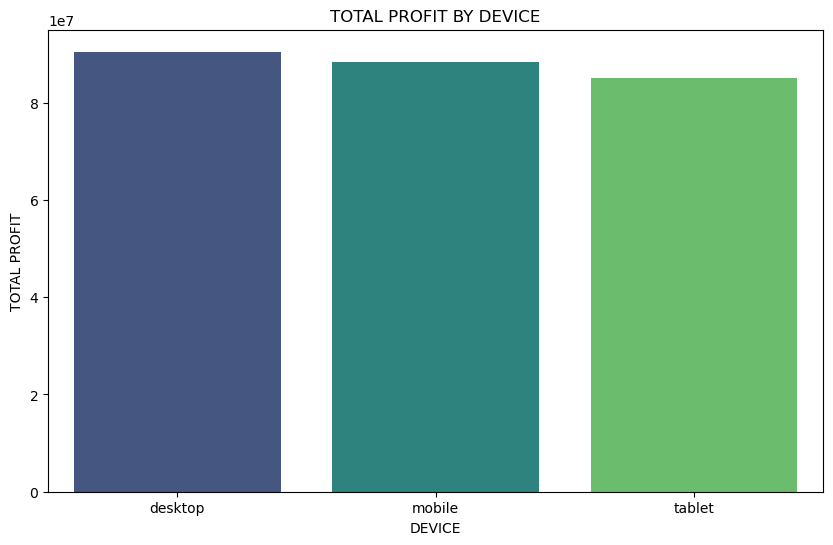

In [67]:
#barplot for DEVICE PERFOMANCE

device_perfomance_reset=device_perfomance.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=device_perfomance_reset,x='DEVICE',y='PROFIT',palette='viridis')

plt.title('TOTAL PROFIT BY DEVICE')
plt.xlabel('DEVICE')
plt.ylabel('TOTAL PROFIT')
plt.show()

This bar chart shows total profit by device type. Desktop has the highest profit, followed closely by mobile, with tablet having the lowest—though all three device types generate high and similar profits

#### 12.CTR (Click Through Rate)

##### The percentage of people who click on an ad or link after seeing it.



In [68]:
# Filter out rows where impressions are zero
filtered_df = df[df['IMPRESSIONS'] > 0]

ctr=filtered_df['CLICKS']/filtered_df['IMPRESSIONS']*100
print('CTR\n',ctr)
print('\n')
avg_ctr=ctr.mean()
print('AVARAGE CTR :',avg_ctr,"%")

CTR
 0       2.312139
1       3.387507
2       1.980634
3       4.458399
4       4.641476
          ...   
2595    1.646707
2596    4.796014
2597    2.967437
2598    3.348710
2599    0.000000
Length: 2546, dtype: float64


AVARAGE CTR : 3.053207367139558 %


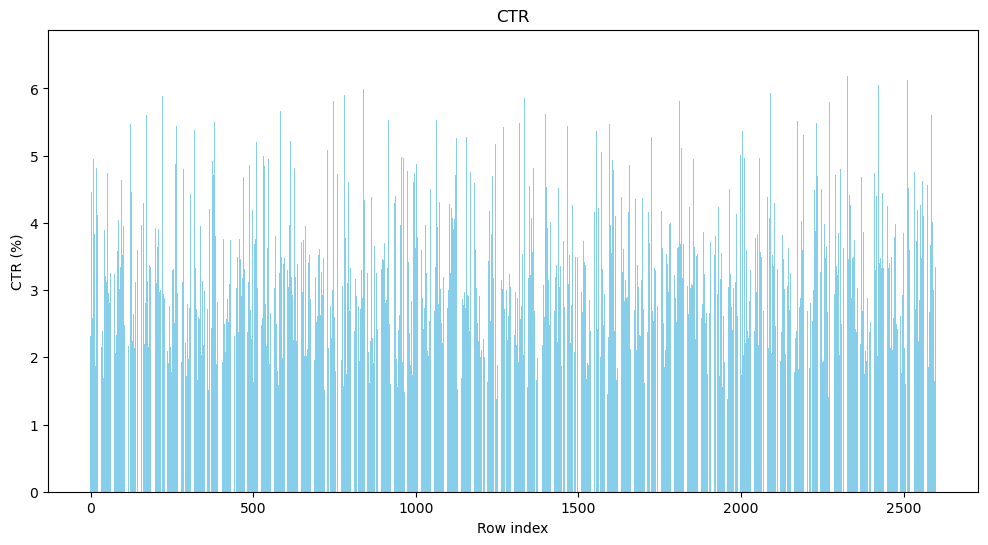

AVARAGE CTR: 3.053207367139558


In [69]:
#CREATING BAR DIAGRAM for CTR

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(filtered_df.index,ctr,color='skyblue')
plt.title('CTR')
plt.xlabel('Row index')
plt.ylabel('CTR (%)')
plt.show()
#print average CTR
print('AVARAGE CTR:',avg_ctr)

This chart shows the Click-Through Rate (CTR) for each row in the dataset. The CTR values mostly fall between 1% and 6%, with a lot of quick spikes and drops—meaning your ad engagement changes frequently across campaigns.This chart displays the Click-Through Rate (CTR) for each ad entry in your dataset. Most CTR values are between 1% and 6%, showing lots of variation across different ads. Each ad gets a different level of engagement.

### CONCLUSION

##### The analysis of the Google Ads campaign data reveals valuable insights into the campaign’s performance and profitability. The average Click-Through Rate (CTR) across the dataset is approximately 3.05%, indicating a healthy engagement level with the ads. Desktop devices have emerged as the most profitable, contributing the highest total profit of around ₹263.91 million, highlighting the importance of device-specific strategy optimization.

##### Cost-efficiency metrics show that the average Cost Per Acquisition (CPA) is ₹3,050, while the average Cost Per Lead (CPL) and Cost Per Click (CPC) are ₹955 and ₹132 respectively. These figures provide an actionable benchmark for evaluating future campaigns and optimizing marketing spend.

##### Daily performance metrics highlight an average of 133 clicks generating a profit of approximately ₹107,237 per day, with a total campaign cost just under ₹44.7 million. The fact that weekdays generate all the recorded profit underlines the importance of scheduling and budget allocation towards these high-performing days.

##### Keyword-level analysis points to “learn data analytics,” “data analytics course,” and related keywords as top revenue generators, each contributing tens of millions in profit. These results underscore the value of targeted, data-driven keyword strategies to maximize return on investment.

##### Overall, the campaign demonstrates effective engagement and profitability, with clear opportunities to refine focus on desktop devices, weekday timing, and high-performing keywords to further improve ROI and reduce acquisition costs.